In [171]:
import numpy as np
import pandas as pd
import os
from collections import Counter

data_folder = "data"
raw_folder = "raw"
aggregate_folder = "aggregated"

In [7]:
df = pd.read_pickle(os.path.join(os.getcwd(), data_folder, aggregate_folder, "train.pkl"))
df.head()

,post,targetMinority,targetCategory,targetStereotype,whoTarget,intentYN,sexYN,offensiveYN,hasBiasedImplication
0,"\n\nBill Kristol and Ben Shaprio, two turds in...",{},[],[],0.0,0.886667,0.0,1.000000,1
1,\n\nRose\n🌹Taylor‏ @RealRoseTaylor 6h6 hours a...,{},[],[],NaN,0.220000,0.0,0.000000,1
2,\nCharlie Kirk‏\n\nJohnny Depp calls for death...,{'liberals': 2},"[social, social]","[miscontrue things, take things in a weird way]",1.0,1.000000,0.0,1.000000,0
3,\nDavid Knight‏ \n\nNotice how quickly things ...,{},[],[],0.0,0.110000,0.0,0.166667,1
4,\nFinland fireball: Time-lapse video shows nig...,{},[],[],NaN,0.000000,0.0,0.000000,1


In [8]:
mask = df["targetMinority"].apply(lambda x: len(x)>1)
print(df[mask].iloc[0]["targetMinority"])
print(df[mask].iloc[0]["post"])

{'middle eastern folks': 2, 'muslim folks': 3, 'muslim folks, arabic folks': 2}

Just watched facial recognition technology from China moving people like crazy through toll places, with just flashes of face... this tech will never takeoff in caveman areas like the Middle East.. acid attack victims and burqa slaves all look the same. 


In [174]:
cat_counter = Counter({cat: 0 for cat in df["targetMinority"].explode().unique()})

for idx, row in df["targetMinority"].items():
    cat_counter.update(row)
cat_counter

Counter({'black folks': 11473,
         'women': 8442,
         'jewish folks': 3906,
         'muslim folks': 1749,
         'gay men': 1057,
         'physically disabled folks': 846,
         'asian folks': 845,
         'assault victims': 782,
         'liberals': 703,
         'latino/latina folks': 599,
         'mass shooting victims': 522,
         'mentally disabled folks': 513,
         'terrorism victims': 430,
         'christian folks': 421,
         'folks with mental illness/disorder': 404,
         'overweight/fat folks': 333,
         'immigrants': 324,
         'arabic folks': 274,
         'lesbian women, gay men': 232,
         'feminists': 211,
         'lesbian women': 202,
         'folks with physical illness/disorder': 196,
         'black folks, asian folks, latino/latina folks, native american/first nation folks': 182,
         'Africans': 180,
         'trans women, trans men': 167,
         'men': 165,
         'white folks': 146,
         'children': 144,


In [88]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model  = SentenceTransformer("all-mpnet-base-v2")
categories = ['African folks', 'african folks', 'africans folks']
embeddings =  model.encode(categories)
similarities = cosine_similarity(embeddings)
similarities

array([[1.0000002, 1.0000002, 0.8952485],
       [1.0000002, 1.0000002, 0.8952485],
       [0.8952485, 0.8952485, 1.0000004]], dtype=float32)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f205c9ab560>
Traceback (most recent call last):
  File "/home/matteo/miniconda3/envs/nlp/lib/python3.11/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/matteo/miniconda3/envs/nlp/lib/python3.11/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/matteo/miniconda3/envs/nlp/lib/python3.11/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/matteo/miniconda3/envs/nlp/lib/python3.11/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
Attri

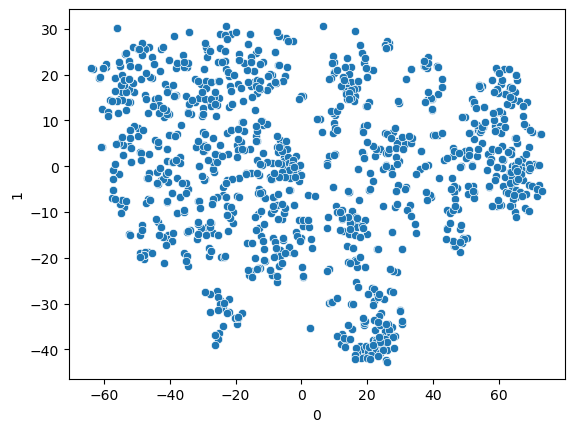

In [100]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import seaborn as sns
from collections import Counter


cat_counter = Counter({cat: 0 for cat in df["targetMinority"].explode().unique()})
mask = df["targetMinority"].apply(lambda x: len(x)>0)
off_df = df[mask]

categories = off_df["targetMinority"].explode().unique()
model  = SentenceTransformer("all-mpnet-base-v2")
embeddings =  model.encode(categories)
cat_emb = {k: v for k,v in zip(categories, embeddings)}

tsne = TSNE(n_components=2)
low_dim_data = tsne.fit_transform(embeddings)
tsne_df =  pd.DataFrame(low_dim_data)
ax = sns.scatterplot(data=tsne_df, x=0, y=1)

In [62]:
U, S, V = np.linalg.svd(embeddings)
print(S)

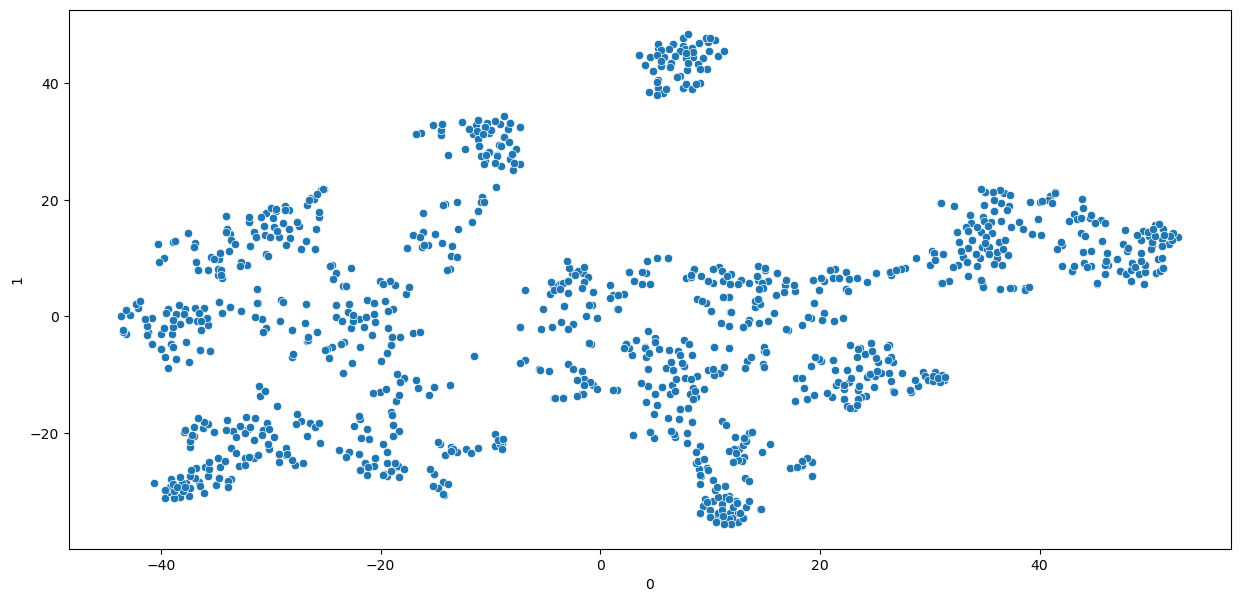

In [257]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=8)
pca_embs = pca.fit_transform(embeddings)

pca_cat_emb = {k: v for k,v in zip(categories, pca_embs)}

tsne = TSNE(n_components=2)
low_dim_data = tsne.fit_transform(pca_embs)

# pca_cat_emb = {k: v for k,v in zip(categories, low_dim_data)}
pca_tsne_df =  pd.DataFrame(low_dim_data)
pca_tsne_df["labels"] = categories

fig, ax = plt.subplots(1, 1, figsize=(15, 7))
sns.scatterplot(data=pca_tsne_df.loc[3:5], x=0, y=1, color="red", ax=ax)
sns.scatterplot(data=pca_tsne_df, x=0, y=1, ax=ax)
plt.show()

In [254]:
mask = tsne_df[0]>30
tsne_df[mask]

,0,1,labels
9,45.760979,10.868467,assault victims
17,33.159660,11.844923,OD victims
26,34.919216,21.280949,Holocaust victims
27,47.970161,5.965205,rape victims
32,49.191006,5.653676,sex trafficking victims
...,...,...,...
1144,33.561005,13.202026,Fire victims
1147,50.945354,13.994791,"harassment victims, rape victims"
1152,34.970299,15.520514,Boston Marathon victims
1153,36.328423,11.592240,AIDS victims


In [241]:
sim_categories = {cat: set() for cat in categories}

for cat1, emb1 in pca_cat_emb.items():
    sim_cat = []
    for cat2, emb2 in pca_cat_emb.items():
        if cat1 != cat2:
            cos_sim = np.dot(emb1, emb2)/(np.linalg.norm(emb1)*np.linalg.norm(emb2))
            if cos_sim > 0.91:
                sim_cat.append(cat2)
    sim_categories[cat1].update(sim_cat)

In [226]:
sim_categories.keys()

dict_keys(['liberals', 'middle eastern folks', 'muslim folks', 'muslim folks, arabic folks', 'immigrants', 'women', 'trans women, trans men', 'folks with physical illness/disorder', 'latino/latina folks', 'assault victims', 'black folks', 'Men', 'prisoners', 'white folks', 'mentally disabled folks', 'physically disabled folks', 'folks with mental illness/disorder', 'OD victims', 'lesbian women, gay men, trans women, trans men, bisexual women, bisexual men', 'ugly folks', 'Gypsies', 'gypsies', 'gay men', 'politicians', 'conservatives', 'old folks', 'Holocaust victims', 'rape victims', 'jewish folks', 'conservatives, alt right', 'americans', 'furries', 'sex trafficking victims', 'refugees', 'trans men', 'syrian', 'syrians', 'married folks', 'jamaican folks', 'illegal immigrants', 'asian folks', 'Africans', 'men', 'Islam', 'White folks', 'Thai', 'mass shooting victims', 'overweight/fat folks', 'cancer victims', 'everyone', 'single mothers', 'vegans', 'well off folks', 'White people', 'mur

In [243]:
sim_categories["African folks"]

{'Mexican people',
 'aboriginal folks',
 'african folks',
 'african people',
 'brown folks',
 'haitians',
 'indigenous folks',
 'jamaican folks',
 'mexican people'}

In [182]:
print(tsne_df[tsne_df["labels"] == "women, lesbian women, gay men, trans women, trans men, bisexual women, bisexual men"])
print(tsne_df[tsne_df["labels"] == "ethiopian"])
print(tsne_df[tsne_df["labels"] == "Ethiopian folks"])

             0          1                                             labels
554  35.886227 -20.866777  women, lesbian women, gay men, trans women, tr...
            0          1     labels
380  6.614554  37.160767  ethiopian
             0         1           labels
262 -34.744164 -2.300832  Ethiopian folks
